In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (8,6)

### 1.	Загрузка датасета в pandas

In [3]:
df = pd.read_csv('cars_sampled.csv', sep=',', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


### 2.	Обработка датасета

In [4]:
df.insert(2, 'datecrawled', df['dateCrawled'])
df = df.drop(columns='dateCrawled')

In [5]:
df.rename(columns={'datecrawled': 'dateCrawled'}, inplace=True)

In [6]:
df.head()

,name,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Zu_verkaufen,2016-03-30 13:51:00,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,Volvo_XC90_2.4D_Summum,2016-07-03 09:54:00,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,Volkswagen_Touran,2016-01-04 00:57:00,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,Seat_Ibiza_1.4_16V_Reference,2016-03-19 17:50:00,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,2016-03-16 14:51:00,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


### 3.	Описательная статистика: размер, типы переменных, пустые значения

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 50001 non-null  object        
 1   dateCrawled          50001 non-null  datetime64[ns]
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

In [8]:
print(f"Размер датасета: {df.shape}")

Размер датасета: (50001, 19)


In [9]:
df.isnull().sum()

name                      0
dateCrawled               0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [10]:
pd.Series({i: df[i].unique() for i in df})

name                   [Zu_verkaufen, Volvo_XC90_2.4D_Summum, Volkswa...
dateCrawled            [2016-03-30T13:51:00.000000000, 2016-07-03T09:...
seller                                             [private, commercial]
offerType                                               [offer, request]
price                  [4450, 13299, 3200, 4500, 18750, 988, 400, 139...
abtest                                                   [test, control]
vehicleType            [limousine, suv, bus, small car, station wagon...
yearOfRegistration     [2003, 2005, 2006, 2008, 1995, 1996, 1997, 200...
gearbox                                         [manual, automatic, nan]
powerPS                [150, 163, 101, 86, 185, 90, 0, 136, 122, 140,...
model                  [3er, xc_reihe, touran, ibiza, passat, astra, ...
kilometer              [150000, 60000, 125000, 5000, 50000, 80000, 90...
monthOfRegistration           [3, 6, 11, 12, 2, 5, 4, 1, 9, 0, 10, 8, 7]
fuelType               [diesel, petrol, nan, cng, l

In [11]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


###  4.	Перевод числовых значений в формат int.

In [12]:
df.dtypes

name                           object
dateCrawled            datetime64[ns]
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [13]:
df = df.astype({'price': 'int64', 'yearOfRegistration': 'int64', 'powerPS': 'int64', 'monthOfRegistration': 'int64', 'postalCode': 'int64', 'kilometer': 'int64'})

In [14]:
df.dtypes

name                           object
dateCrawled            datetime64[ns]
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

### 5.	Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

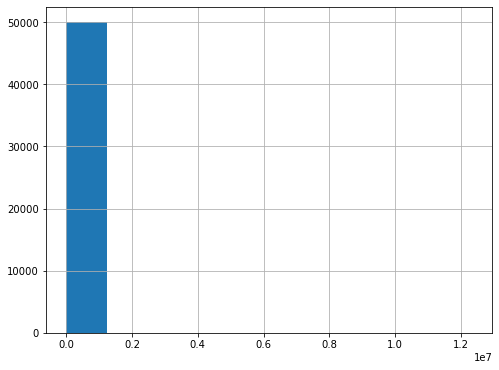

In [15]:
df.price.hist(bins=10)
plt.show()

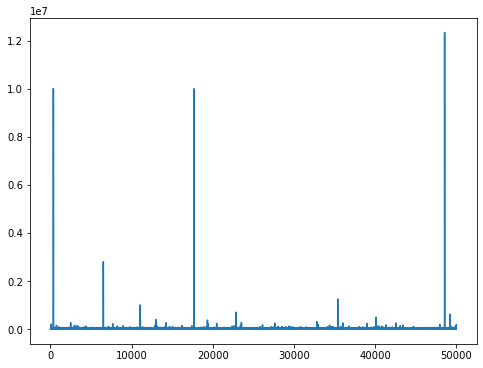

In [16]:
plt.plot(df['price'])
plt.show()

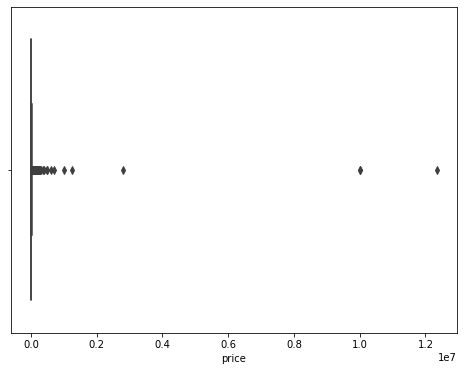

In [17]:
sns.boxplot(x='price', data=df);

In [18]:
quantile_low = df['price'].quantile(0.25)
quantile_high = df['price'].quantile(0.75)
ddf = df[(df['price'] <= quantile_high) & (df['price'] >= quantile_low)]['price']
df.loc[df['price'] > quantile_high,'price'] = ddf.min()+np.random.normal(ddf.mean(), ddf.std()/2, (df['price'] > quantile_high).sum())
df.loc[df['price'] < quantile_low,'price'] =  ddf.min()+np.random.normal(ddf.mean(), ddf.std()/2, (df['price'] < quantile_low).sum())

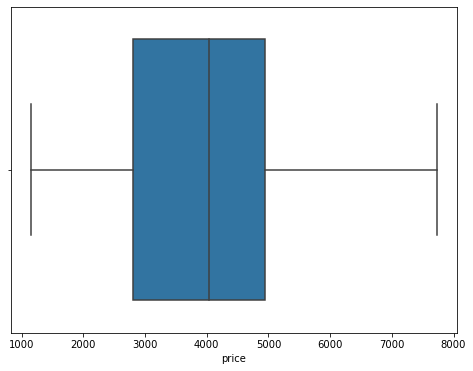

In [19]:
sns.boxplot(x='price', data=df);

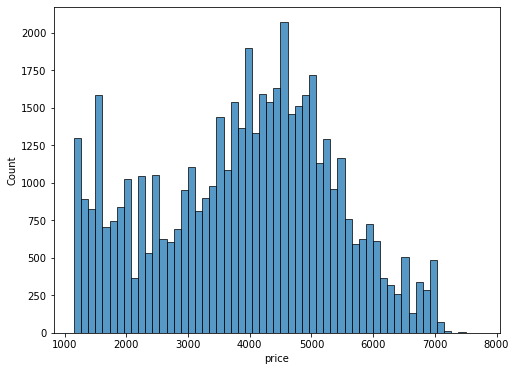

In [20]:
sns.histplot(x='price', data=df);

### 6.	Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д).

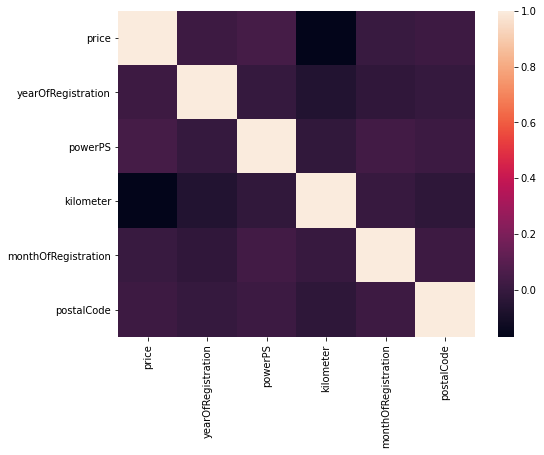

In [21]:
sns.heatmap(df.corr());

#### PowerPS

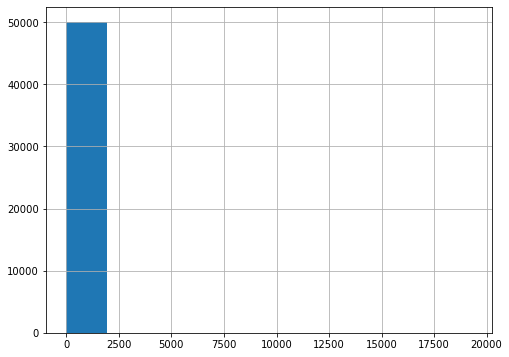

In [22]:
df.powerPS.hist(bins=10)
plt.show()

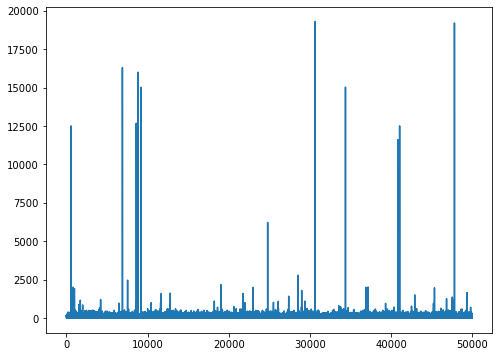

In [23]:
plt.plot(df['powerPS'])
plt.show()

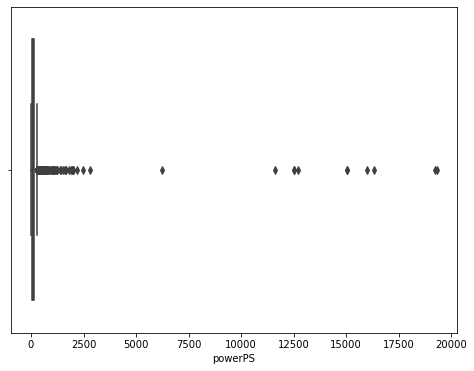

In [24]:
sns.boxplot(x='powerPS', data=df);

In [25]:
quantile_low = df['powerPS'].quantile(0.25)
quantile_high = df['powerPS'].quantile(0.75)
ddf = df[(df['powerPS'] <= quantile_high) & (df['powerPS'] >= quantile_low)]['powerPS']
df.loc[df['powerPS'] > quantile_high,'powerPS'] = np.random.normal(ddf.mean(), ddf.std()/2, (df['powerPS'] > quantile_high).sum())
df.loc[df['powerPS'] < quantile_low,'powerPS'] =  np.random.normal(ddf.mean(), ddf.std()/2, (df['powerPS'] < quantile_low).sum())

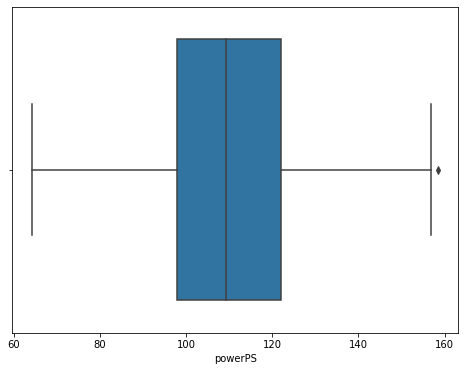

In [26]:
sns.boxplot(x='powerPS', data=df);

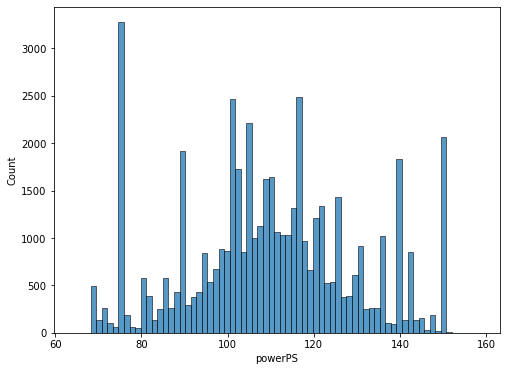

In [27]:
sns.histplot(x='powerPS', data=df)
plt.show()

#### YearOfRegistration

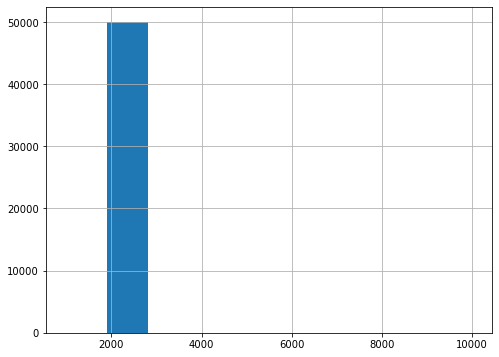

In [28]:
df.yearOfRegistration.hist(bins=10)
plt.show()

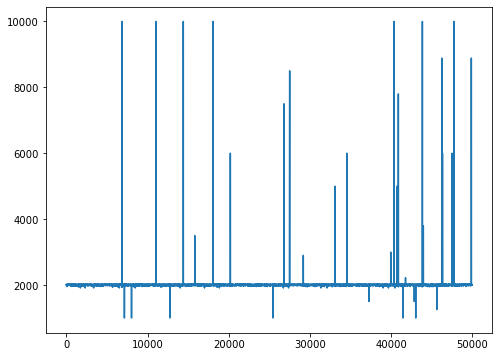

In [29]:
plt.plot(df['yearOfRegistration'])
plt.show()

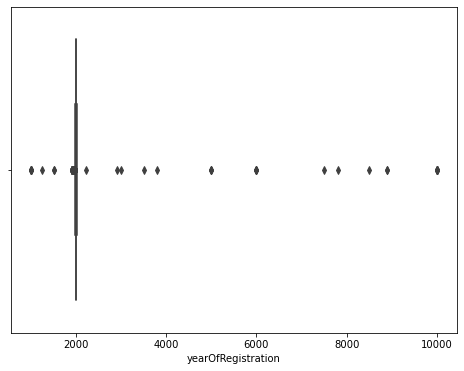

In [30]:
sns.boxplot(x='yearOfRegistration', data=df);

In [31]:
df['yearOfRegistration'].sort_values().unique()

array([1000, 1255, 1500, 1910, 1928, 1929, 1933, 1934, 1936, 1938, 1940,
       1941, 1943, 1945, 1947, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2222, 2900, 3000,
       3500, 3800, 5000, 6000, 7500, 7800, 8500, 8888, 9999], dtype=int64)

In [32]:
ddf = df[(df['yearOfRegistration'] <= 2022) & (df['yearOfRegistration'] >= 1928)]['yearOfRegistration']
df.loc[df['yearOfRegistration'] > 2022,'yearOfRegistration'] = ddf.median()
df.loc[df['yearOfRegistration'] < 1928,'yearOfRegistration'] = ddf.median()

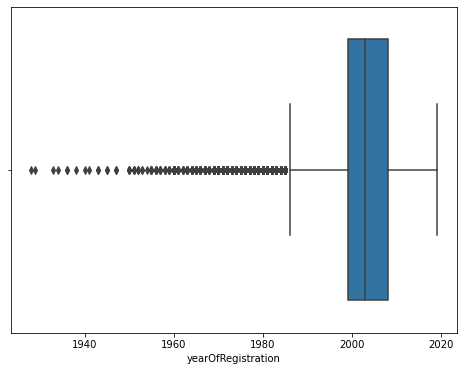

In [33]:
sns.boxplot(x='yearOfRegistration', data=df);

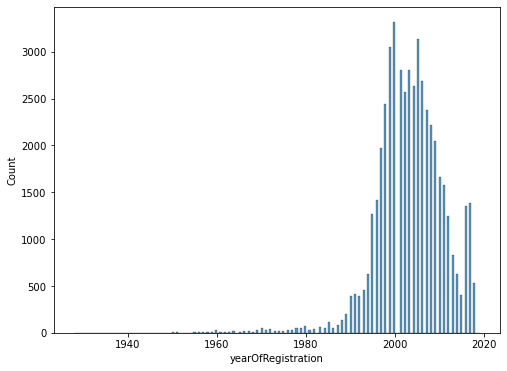

In [34]:
sns.histplot(x='yearOfRegistration', data=df)
plt.show()

#### MonthOfRegistration

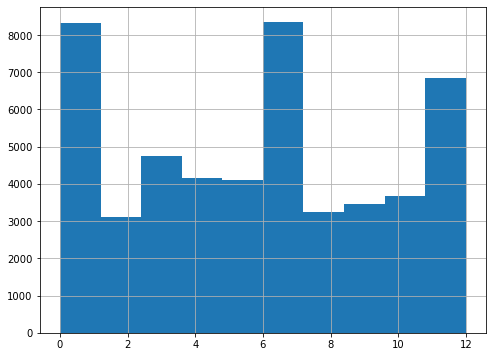

In [35]:
df.monthOfRegistration.hist(bins=10)
plt.show()

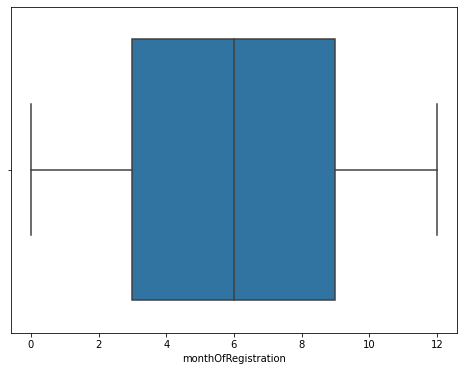

In [36]:
sns.boxplot(x='monthOfRegistration', data=df);

In [37]:
df['monthOfRegistration'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [38]:
df.loc[df['monthOfRegistration' ]== 0, 'monthOfRegistration'] = np.random.randint(1, 13)

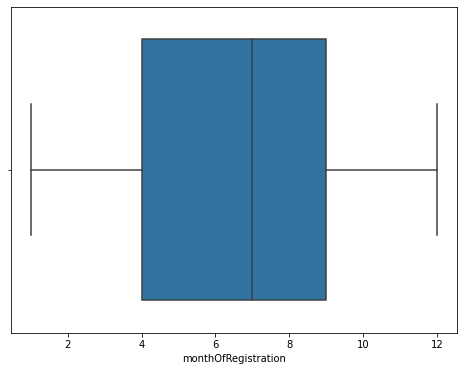

In [39]:
sns.boxplot(x='monthOfRegistration', data=df);

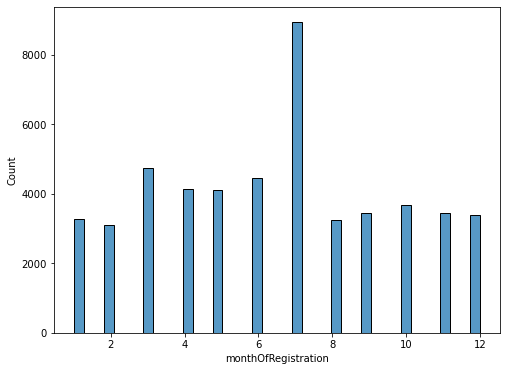

In [40]:
sns.histplot(x='monthOfRegistration', data=df)
plt.show()

#### Kilometer

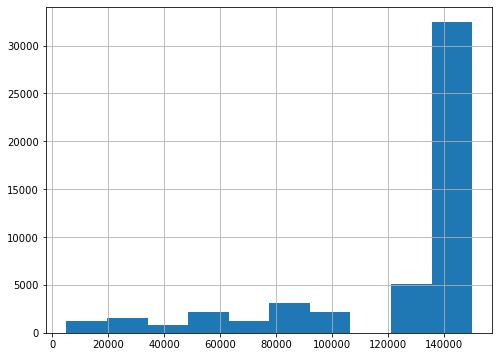

In [41]:
df.kilometer.hist(bins=10)
plt.show()

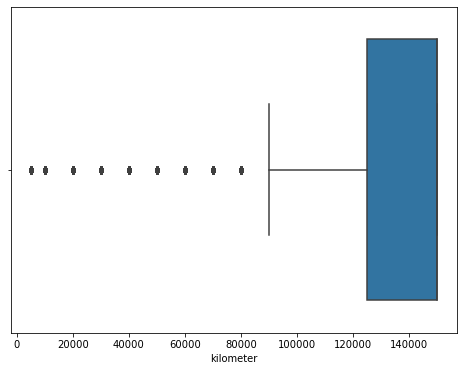

In [42]:
sns.boxplot(x='kilometer', data=df);

In [43]:
df['kilometer'].sort_values().unique()

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000], dtype=int64)

#### PostalCode

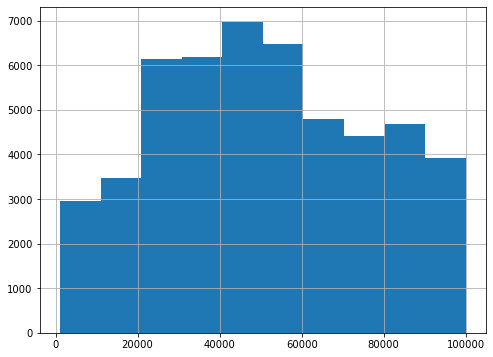

In [44]:
df.postalCode.hist(bins=10)
plt.show()

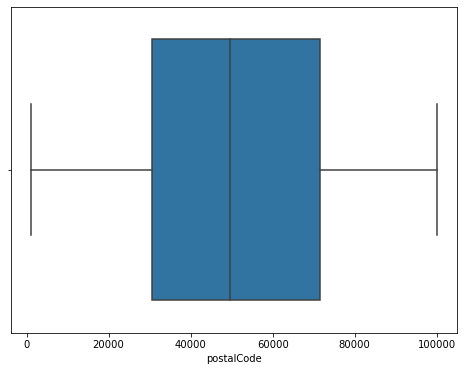

In [45]:
sns.boxplot(x='postalCode', data=df);

In [105]:
df = df.astype({'price': 'int64', 'yearOfRegistration': 'int64', 'powerPS': 'int64', 'monthOfRegistration': 'int64', 'postalCode': 'int64', 'kilometer': 'int64'})

### 7.	Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price.

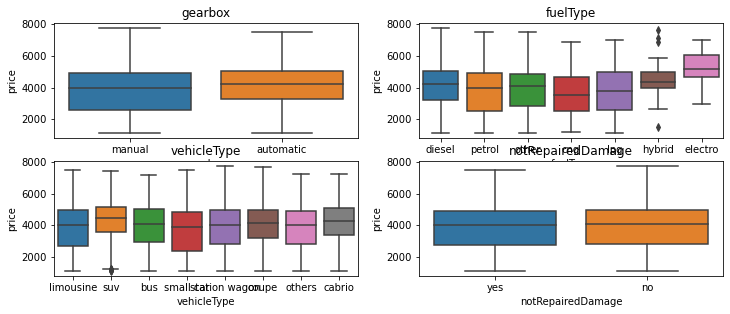

In [102]:
sns.boxplot(x='gearbox', y='price', data=df);
plt.rcParams['figure.figsize'] = (10,30)
for i, col in enumerate(['gearbox', 'fuelType', 'vehicleType', 'notRepairedDamage']):
    plt.subplot(12, 2, i+1)
    sns.boxplot(x=col, y='price', data=df);
    plt.title(col)

Значения с малой частотой убирать нельзя, так как в этом случае достоверность предсказания будет низка

### 8.	Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [47]:
df.isnull().sum()

name                      0
dateCrawled               0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [48]:
df.loc[df['vehicleType'].isna(), 'vehicleType'] = 'others'
df.loc[df['gearbox'].isna(), 'gearbox'] = np.random.choice(['manual', 'automatic'])
df.loc[df['fuelType'].isna(), 'fuelType'] = 'other'
df.loc[df['notRepairedDamage'].isna(), 'notRepairedDamage'] = np.random.choice(['no', 'yes'])
df.loc[df['model'].isna(), 'model'] = 'others'

In [49]:
df.isnull().sum()

name                   0
dateCrawled            0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

### 9.	Сохраните полученный датасет и выведете его.

In [107]:
df.to_csv('cars_result.csv', header=True, index=False)

In [108]:
df.head()

,name,dateCrawled,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Zu_verkaufen,2016-03-30 13:51:00,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,yes,2016-03-30,20257,2016-07-04 04:44:00
1,Volvo_XC90_2.4D_Summum,2016-07-03 09:54:00,private,offer,4364,control,suv,2005,manual,99,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,Volkswagen_Touran,2016-01-04 00:57:00,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,yes,2016-03-31,27449,2016-01-04 08:40:00
3,Seat_Ibiza_1.4_16V_Reference,2016-03-19 17:50:00,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,2016-03-16 14:51:00,private,offer,4525,test,suv,2008,automatic,94,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00
